In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# 讀取數據
df = pd.read_csv('train.csv')
df

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,0,75659.32872,M,graduate_school,married,53.0,-1.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000,0
1,1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495,0
2,2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113,0
3,3,157744.09660,M,graduate_school,married,34.0,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,18400.055470,1547.887184,2.558114,0
4,5,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,NaN,193.835523,397.170110,0.000000,1395.861422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20644,23203,48443.44654,M,graduate_school,single,29.0,-1.0,-1.0,-1.0,-1.0,64.409146,64.409146,64.409146,414.621668,64.409146,64.409146,414.621668,134.155089,0
20645,23204,110098.06710,F,university,married,36.0,1.0,1.0,1.0,1.0,21815.729230,19717.923360,15197.977010,12257.308490,783.841260,754.001390,240.003713,239.255805,0
20646,23205,237841.42300,F,university,married,42.0,1.0,1.0,1.0,1.0,197659.246100,202892.399200,147770.694800,22765.992910,3632.499761,2915.937494,397.170110,397.170110,0
20647,23206,105024.75430,F,university,married,34.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,10.739167,0.000000,0.000000,10.739167,77.300315,0


### Task 1

<AxesSubplot:xlabel='gender', ylabel='count'>

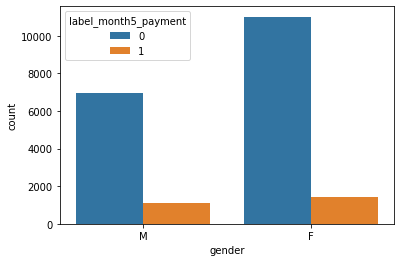

In [3]:
# 女性比例上來看較會按時繳費

sns.countplot(x='gender',data=df,hue='label_month5_payment')

[Text(0, 0, 'graduate_school'),
 Text(1, 0, 'high_school'),
 Text(2, 0, 'university'),
 Text(3, 0, 'others'),
 Text(4, 0, 'unknown'),
 Text(5, 0, 'unviersity'),
 Text(6, 0, '0')]

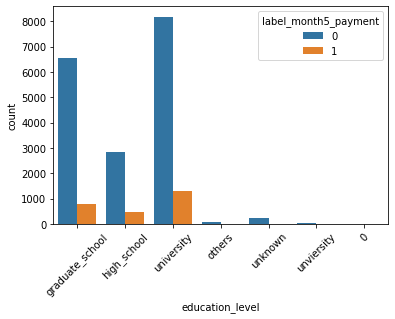

In [4]:
# 教育程度也看不出相對關係，其他值數量較少，甚至有錯字與無用值

ax = sns.countplot(x='education_level',data=df,hue='label_month5_payment')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

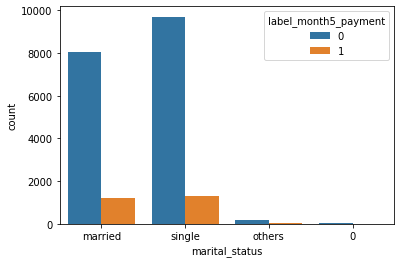

In [5]:
# 單身與否也看不出關係(單身比例上看起來較準時繳。沒額外負擔容易準時繳嗎)

sns.countplot(x='marital_status',data=df,hue='label_month5_payment')

In [6]:
df.describe()

,id,credit_limit,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
count,20649.000000,20649.000000,20508.000000,20591.000000,20576.000000,20630.000000,20587.000000,20200.000000,20134.000000,20072.000000,20142.000000,20609.000000,20619.000000,20584.000000,20629.000000,20649.000000
mean,11569.652961,68740.122741,35.701287,0.891555,0.785381,0.759089,0.713509,17566.107286,16804.577554,15879.401317,14451.622958,1379.720663,1476.947104,1279.424302,1160.473618,0.123977
std,6695.706440,62774.700876,12.450595,1.056878,1.129699,1.131490,1.100866,30969.151735,29887.984238,28339.166825,26381.240246,7045.820783,9613.550814,7626.208136,5994.219687,0.329563
min,0.000000,1788.854382,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5773.000000,16798.250460,28.000000,0.000000,0.000000,0.000000,0.000000,602.360446,511.550012,468.022069,391.056540,102.989445,100.594674,40.190789,25.351146,0.000000
50%,11548.000000,52806.704210,34.000000,1.000000,1.000000,1.000000,1.000000,5268.484703,4945.392125,4521.385628,4132.008741,273.668783,256.574183,237.089520,181.019336,0.000000
75%,17369.000000,100000.000000,41.000000,1.000000,1.000000,1.000000,1.000000,20012.600110,19113.165365,17603.542878,15762.261530,808.946548,761.345360,752.120619,632.137192,0.000000
max,23207.000000,565685.424900,255.000000,9.000000,9.000000,9.000000,9.000000,540703.238100,554345.841400,357761.944900,490093.609600,477733.770400,730578.640800,493155.902900,311845.505700,1.000000


In [7]:
# 離群值處理
df.loc[df['age']>80,'age']=29
df.loc[df['payment_delay_month4(larger value means longer delay)']<0,'payment_delay_month4(larger value means longer delay)']=0
df.loc[df['payment_delay_month3(larger value means longer delay)']<0,'payment_delay_month3(larger value means longer delay)']=0
df.loc[df['payment_delay_month2(larger value means longer delay)']<0,'payment_delay_month2(larger value means longer delay)']=0
df.loc[df['payment_delay_month1(larger value means longer delay)']<0,'payment_delay_month1(larger value means longer delay)']=0

In [8]:
df

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,0,75659.32872,M,graduate_school,married,53.0,0.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000,0
1,1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495,0
2,2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113,0
3,3,157744.09660,M,graduate_school,married,34.0,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,18400.055470,1547.887184,2.558114,0
4,5,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,NaN,193.835523,397.170110,0.000000,1395.861422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20644,23203,48443.44654,M,graduate_school,single,29.0,0.0,0.0,0.0,0.0,64.409146,64.409146,64.409146,414.621668,64.409146,64.409146,414.621668,134.155089,0
20645,23204,110098.06710,F,university,married,36.0,1.0,1.0,1.0,1.0,21815.729230,19717.923360,15197.977010,12257.308490,783.841260,754.001390,240.003713,239.255805,0
20646,23205,237841.42300,F,university,married,42.0,1.0,1.0,1.0,1.0,197659.246100,202892.399200,147770.694800,22765.992910,3632.499761,2915.937494,397.170110,397.170110,0
20647,23206,105024.75430,F,university,married,34.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,10.739167,0.000000,0.000000,10.739167,77.300315,0


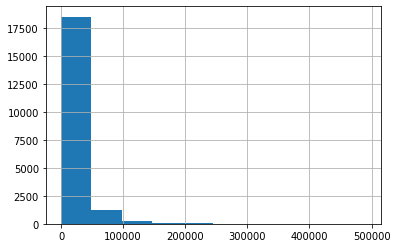

In [9]:
# 繳費紀錄來看，分布較廣，離群較大繳數量較少

df['bill_amount_month1'].hist()
plt.show()

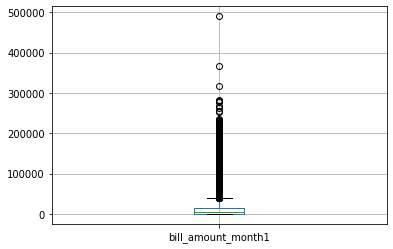

In [10]:
# 盒鬚圖來看，離群值較嚴重

df[['bill_amount_month1']].boxplot()
plt.show()

In [11]:
# 去離群值

def Q_fun(data):
    Q1 = df[data].quantile(q = 0.25)
    Q3 = df[data].quantile(q = 0.75)
    low_limit = Q1 - 1.5*(Q3 - Q1)
    up_limit = Q3 + 1.5*(Q3 - Q1)
    return up_limit

In [12]:
df_clear1 = df.drop(df[(df['bill_amount_month4'] > Q_fun('bill_amount_month4'))].index)
df_clear2 = df_clear1.drop(df_clear1[(df_clear1['bill_amount_month3'] > Q_fun('bill_amount_month3'))].index)
df_clear3 = df_clear2.drop(df_clear2[(df_clear2['bill_amount_month2'] > Q_fun('bill_amount_month2'))].index)
df_clear4 = df_clear3.drop(df_clear3[(df_clear3['bill_amount_month1'] > Q_fun('bill_amount_month1'))].index)
df_clear5 = df_clear4.drop(df_clear4[(df_clear4['bill_amount_month1'] > Q_fun('bill_amount_month1'))].index)
df_clear6 = df_clear5.drop(df_clear5[(df_clear5['previous_payment_month4'] > Q_fun('previous_payment_month4'))].index)
df_clear7 = df_clear6.drop(df_clear6[(df_clear6['previous_payment_month3'] > Q_fun('previous_payment_month3'))].index)
df_clear8 = df_clear7.drop(df_clear7[(df_clear7['previous_payment_month2'] > Q_fun('previous_payment_month2'))].index)
df_clear9 = df_clear8.drop(df_clear8[(df_clear8['previous_payment_month1'] > Q_fun('previous_payment_month1'))].index)
df_clear9

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,0,75659.32872,M,graduate_school,married,53.0,0.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000,0
1,1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495,0
2,2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113,0
4,5,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,NaN,193.835523,397.170110,0.000000,1395.861422,0
5,6,27885.48009,F,university,single,24.0,1.0,1.0,1.0,1.0,27001.790740,24331.012430,19679.265230,8087.427712,438.626650,395.681281,340.922485,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20641,23200,27885.48009,F,university,single,28.0,1.0,1.0,1.0,1.0,24653.291800,10043.135100,6945.571202,4428.177890,239.255805,152.644711,106.920656,0.000000,0
20642,23201,44157.46969,M,high_school,single,27.0,3.0,0.0,0.0,0.0,237.014889,190.400785,140.444249,246.605318,191.115342,140.444249,246.605318,0.000000,0
20644,23203,48443.44654,M,graduate_school,single,29.0,0.0,0.0,0.0,0.0,64.409146,64.409146,64.409146,414.621668,64.409146,64.409146,414.621668,134.155089,0
20645,23204,110098.06710,F,university,married,36.0,1.0,1.0,1.0,1.0,21815.729230,19717.923360,15197.977010,12257.308490,783.841260,754.001390,240.003713,239.255805,0


In [13]:
df_new = df_clear9.iloc[:,0:18]

In [14]:
# 將文字資料轉onehotencode
df_gender = pd.get_dummies(df_new[['gender']])
df_edu = pd.get_dummies(df_new[['education_level']])
df_mar = pd.get_dummies(df_new[['marital_status']])
df_label = pd.get_dummies(df[['label_month5_payment']])
df_new_1 = pd.concat([df_new,df_gender,df_edu,df_mar,df_label], axis=1, join='inner')
df_new_1.head()

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),...,education_level_high_school,education_level_others,education_level_university,education_level_unknown,education_level_unviersity,marital_status_0,marital_status_married,marital_status_others,marital_status_single,label_month5_payment
0,0,75659.32872,M,graduate_school,married,53.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,...,1,0,0,0,0,0,1,0,0,0
2,2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
4,5,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
5,6,27885.48009,F,university,single,24.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# 砍掉較不重要的欄位或補植 (平均、眾數)

df_new_1 = df_new_1.drop(columns=['gender','education_level','marital_status','education_level_others','education_level_unknown','education_level_unviersity','education_level_0','marital_status_0','marital_status_others'])
#df_new_1 = df_new_1.dropna()
#df_new_1 = df_new_1.fillna(df_new_1.mean())
df_new_1 = df_new_1.fillna(df_new_1.mode().iloc[0])
df_new_1

,id,credit_limit,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,...,previous_payment_month2,previous_payment_month1,gender_F,gender_M,education_level_graduate_school,education_level_high_school,education_level_university,marital_status_married,marital_status_single,label_month5_payment
0,0,75659.32872,53.0,0.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,...,515.513381,0.000000,0,1,1,0,0,1,0,0
1,1,10119.28851,46.0,0.0,0.0,1.0,1.0,2.378414,217.039935,107.684919,...,100.594674,22.241495,1,0,0,1,0,1,0,0
2,2,13374.80610,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,...,397.170110,397.501113,1,0,0,0,1,1,0,0
4,5,120385.03030,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,...,0.000000,1395.861422,1,0,1,0,0,0,1,0
5,6,27885.48009,24.0,1.0,1.0,1.0,1.0,27001.790740,24331.012430,19679.265230,...,340.922485,0.000000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20641,23200,27885.48009,28.0,1.0,1.0,1.0,1.0,24653.291800,10043.135100,6945.571202,...,106.920656,0.000000,1,0,0,0,1,0,1,0
20642,23201,44157.46969,27.0,3.0,0.0,0.0,0.0,237.014889,190.400785,140.444249,...,246.605318,0.000000,0,1,0,1,0,0,1,0
20644,23203,48443.44654,29.0,0.0,0.0,0.0,0.0,64.409146,64.409146,64.409146,...,414.621668,134.155089,0,1,1,0,0,0,1,0
20645,23204,110098.06710,36.0,1.0,1.0,1.0,1.0,21815.729230,19717.923360,15197.977010,...,240.003713,239.255805,1,0,0,0,1,1,0,0


In [16]:
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13870 entries, 0 to 20647
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   id                                                     13870 non-null  int64  
 1   credit_limit                                           13870 non-null  float64
 2   age                                                    13870 non-null  float64
 3   payment_delay_month4(larger value means longer delay)  13870 non-null  float64
 4   payment_delay_month3(larger value means longer delay)  13870 non-null  float64
 5   payment_delay_month2(larger value means longer delay)  13870 non-null  float64
 6   payment_delay_month1(larger value means longer delay)  13870 non-null  float64
 7   bill_amount_month4                                     13870 non-null  float64
 8   bill_amount_month3                            

In [17]:
# 與label 5 的關聯度(credit_limit與 payment_delay)最有相關

df_new_1.corr()['label_month5_payment'].abs()>0.1

id                                                       False
credit_limit                                              True
age                                                      False
payment_delay_month4(larger value means longer delay)     True
payment_delay_month3(larger value means longer delay)     True
payment_delay_month2(larger value means longer delay)     True
payment_delay_month1(larger value means longer delay)     True
bill_amount_month4                                       False
bill_amount_month3                                       False
bill_amount_month2                                       False
bill_amount_month1                                       False
previous_payment_month4                                  False
previous_payment_month3                                  False
previous_payment_month2                                  False
previous_payment_month1                                  False
gender_F                                               

In [18]:
# 產生新的 dataframe 

df_new_clearn = pd.DataFrame(df_new_1,columns=['age','payment_delay_month4(larger value means longer delay)','payment_delay_month3(larger value means longer delay)','payment_delay_month2(larger value means longer delay)','payment_delay_month1(larger value means longer delay)','label_month5_payment'])
df_new_clearn

,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),label_month5_payment
0,53.0,0.0,0.0,0.0,0.0,0
1,46.0,0.0,0.0,1.0,1.0,0
2,31.0,1.0,1.0,1.0,1.0,0
4,29.0,1.0,1.0,1.0,1.0,0
5,24.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...
20641,28.0,1.0,1.0,1.0,1.0,0
20642,27.0,3.0,0.0,0.0,0.0,0
20644,29.0,0.0,0.0,0.0,0.0,0
20645,36.0,1.0,1.0,1.0,1.0,0


### Task 2

#### 邏輯斯

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
# train = df_new_1.iloc[:,0:22]
# label = df_new_1.iloc[:,-1]

train = df_new_clearn.iloc[:,0:4]
label = df_new_clearn.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(train,label,test_size = 0.2 , random_state=42)

In [22]:
print(x_train.shape,y_train.shape)

(11096, 4) (11096,)


In [23]:
print(x_train.size,x_test.size)
print(y_train.size,y_test.size)

44384 11096
11096 2774


In [24]:
# 選擇優化算法solver，搭配max_iter 最大迭代次數

model = LogisticRegression(solver='liblinear',max_iter=100)
model_data = model.fit(x_train,y_train)
print('預測準度為:', model_data.score(x_test,y_test))

預測準度為: 0.861211247296323


In [25]:
# 驗證模型

from sklearn.metrics import confusion_matrix,accuracy_score
y_pre = model_data.predict(x_test)
matrix=confusion_matrix(y_test,y_pre)
accuracy = accuracy_score(y_test,y_pre)
display(matrix)
display(accuracy)

array([[2362,   17],
       [ 368,   27]], dtype=int64)

0.861211247296323

In [26]:
# 交叉驗證

from sklearn.model_selection import cross_val_score
print(cross_val_score(model_data, train, label, cv=10))
print('平均分數為:',cross_val_score(model_data, train, label, cv=10).mean())

[0.85364095 0.85868782 0.85796683 0.85364095 0.85364095 0.85364095
 0.86373468 0.86085076 0.85652487 0.85652487]
平均分數為: 0.8568853640951695


#### 決策樹

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [28]:
# 建立模型與訓練模型

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf = tree.fit(x_train, y_train)
score = tree_clf.score(x_test,y_test)
print('決策樹分數為:',score)

決策樹分數為: 0.8677000720980533


In [29]:
# 驗證模型

from sklearn.metrics import confusion_matrix,classification_report
y_pre = tree_clf.predict(x_test)
matrix=confusion_matrix(y_test,y_pre)
accuracy = accuracy_score(y_test,y_pre)
print(matrix)
print(classification_report(y_test, y_pre))

[[2286   93]
 [ 274  121]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2379
           1       0.57      0.31      0.40       395

    accuracy                           0.87      2774
   macro avg       0.73      0.63      0.66      2774
weighted avg       0.85      0.87      0.85      2774



In [30]:
# 交叉驗證

from sklearn.model_selection import cross_val_score
print(cross_val_score(tree_clf, train, label, cv=10))
print('平均分數為:',cross_val_score(tree_clf, train, label, cv=10).mean())

[0.8702235  0.86229272 0.86733958 0.86806056 0.85868782 0.86012978
 0.8594088  0.8702235  0.86806056 0.86950252]
平均分數為: 0.8653929343907713


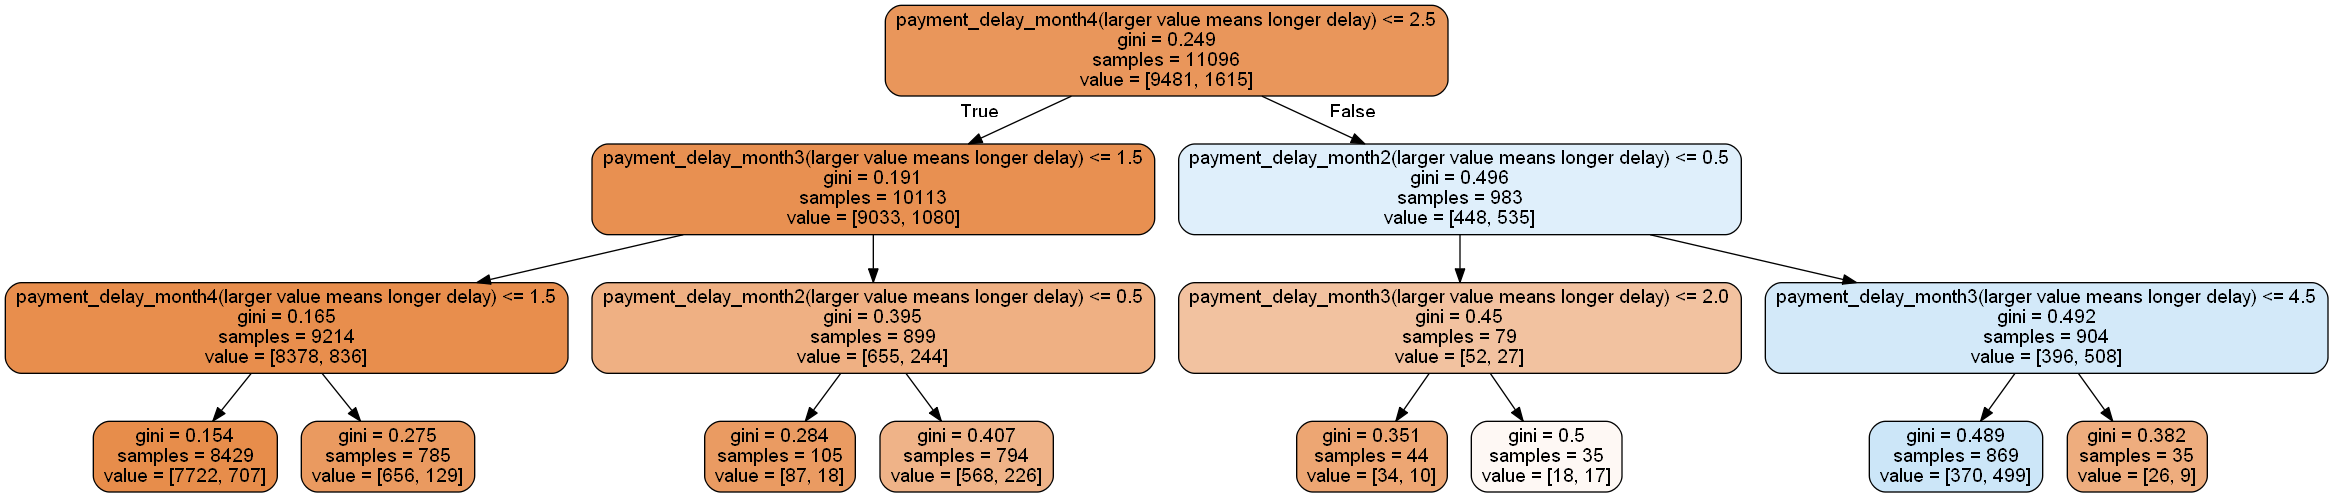

In [31]:
from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(
        tree_clf,
        out_file=None,
        feature_names = x_train.columns,
        rounded=True,
        filled=True
    )
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [32]:
import pickle

# 儲存模型
filename = 'Decision_Tree_model_001.sav'
pickle.dump(tree_clf, open(filename, 'wb'))

#### 隨機森林

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,roc_auc_score

In [34]:
# 建立隨機森林模型
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
# 訓練資料
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

In [35]:
# 預測 predict獲取結果
pre_x_train = rnd_clf.predict(x_train)
pre_x_test = rnd_clf.predict(x_test)

In [36]:
# 模型分數

print('隨機森林分數為:',accuracy_score(y_test,pre_x_test))

隨機森林分數為: 0.8658976207642394


In [37]:
# 驗證模型

from sklearn.metrics import confusion_matrix
y_pre = rnd_clf.predict(x_test)
matrix=confusion_matrix(y_test,y_pre)
accuracy = accuracy_score(y_test,y_pre)
display(matrix)
display(accuracy)

array([[2295,   84],
       [ 288,  107]], dtype=int64)

0.8658976207642394

In [38]:
# 交叉驗證

from sklearn.model_selection import cross_val_score
print(cross_val_score(rnd_clf, train, label, cv=10))
print('平均分數為:',cross_val_score(rnd_clf, train, label, cv=10).mean())

[0.86878154 0.8594088  0.86733958 0.86806056 0.85652487 0.86085076
 0.85868782 0.87382841 0.86733958 0.87238645]
平均分數為: 0.8653208363374189


In [39]:
'''
小結 : 

1. 去除Nan 模型分數約為 決策樹0.861 隨機森林 0.858 邏輯斯 0.860
2. 補平均值模型分數約為 決策樹0.868 隨機森林 0.862 邏輯斯 0.863
3. 補眾數模型分數約為 決策樹0.869 隨機森林 0.862 邏輯斯 0.863
--> 補眾數效果較好，但差異不大


1. 使用邏輯斯，決策樹或是隨機森林的在初始或驗證後的分數約為0.86~0.87，決策樹分數稍高
2. 補植(去除空值、平均值、眾數)無明顯差異
3. 調整離群值無明顯差異
4. 去除經pearson過的無相關欄位，無明顯差異
--> 之前遲交的人後續遲交的機率較大，可直接取遲交欄位進行分析

'''

'\n小結 : \n\n1. 去除Nan 模型分數約為 決策樹0.861 隨機森林 0.858 邏輯斯 0.860\n2. 補平均值模型分數約為 決策樹0.868 隨機森林 0.862 邏輯斯 0.863\n3. 補眾數模型分數約為 決策樹0.869 隨機森林 0.862 邏輯斯 0.863\n--> 補眾數效果較好，但差異不大\n\n\n1. 使用邏輯斯，決策樹或是隨機森林的在初始或驗證後的分數約為0.86~0.87，決策樹分數稍高\n2. 補植(去除空值、平均值、眾數)無明顯差異\n3. 調整離群值無明顯差異\n4. 去除經pearson過的無相關欄位，無明顯差異\n--> 之前遲交的人後續遲交的機率較大，可直接取遲交欄位進行分析\n\n'

### Task3

In [40]:
# 讀取數據
df_test = pd.read_csv('test.csv')
df_test

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,23208,1788.854382,M,university,single,24.0,1.0,1.0,1.0,1.0,1575.742270,914.230348,1103.194295,1496.144766,139.638180,126.343105,239.255805,0.000000,NaN
1,23209,13374.806100,F,university,single,29.0,-1.0,-1.0,-1.0,-1.0,851.135758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,23210,44157.469690,F,graduate_school,single,30.0,3.0,3.0,3.0,3.0,41898.135590,43421.190960,44016.974810,44606.717640,1165.864088,752.120619,752.120619,0.000000,NaN
3,23211,105024.754300,F,university,single,33.0,NaN,3.0,3.0,1.0,104091.472200,108043.199300,104471.142100,44646.288140,4383.993984,1.100981,382.989549,57090.434060,NaN
4,23212,152286.022800,M,graduate_school,married,49.0,-1.0,-1.0,-1.0,-1.0,6336.643691,607.175603,169.498049,682.283173,607.175603,171.034746,698.548861,28.343813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,26203,52806.704210,M,high_school,married,37.0,5.0,5.0,5.0,4.0,53298.703310,54478.422120,52947.559620,51923.239890,1044.038911,0.000000,43.567480,0.000000,NaN
2996,26204,157744.096600,M,university,single,30.0,1.0,1.0,1.0,0.0,116362.641300,54594.905360,0.000000,0.663232,1165.864088,0.000000,0.663232,0.000000,NaN
2997,26205,4254.636718,M,university,single,22.0,3.0,4.0,3.0,3.0,3805.410219,3654.670188,3507.466123,4209.479336,0.000000,0.000000,397.170110,0.000000,NaN
2998,26206,4254.636718,M,high_school,single,40.0,2.0,-1.0,NaN,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [41]:
df_test.describe()

,id,credit_limit,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
count,3000.000000,3000.000000,2983.000000,2986.000000,2989.000000,2995.000000,2987.000000,2930.000000,2925.000000,2.928000e+03,2933.000000,2992.000000,2.994000e+03,2993.000000,2997.000000,0.0
mean,24707.500000,64292.310208,35.222259,0.983925,0.858481,0.827045,0.763308,17451.915345,16630.987112,1.617191e+04,14171.215170,1231.073545,1.890084e+03,1263.441287,1160.731074,NaN
std,866.169729,61234.498483,9.115432,1.101731,1.180942,1.180504,1.187631,29910.019147,28382.426606,3.430231e+04,25640.198991,4676.579459,2.189174e+04,7002.409934,6700.118217,NaN
min,23208.000000,1788.854382,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN
25%,23957.750000,13374.806100,28.000000,0.000000,0.000000,0.000000,0.000000,626.376468,575.814878,4.752590e+02,348.160658,100.594674,6.954220e+01,31.003145,10.179465,NaN
50%,24707.500000,44157.469690,34.000000,1.000000,1.000000,1.000000,1.000000,5573.974234,5596.995643,4.756763e+03,4122.890164,261.892502,2.392558e+02,202.186323,160.060803,NaN
75%,25457.250000,90102.073240,41.000000,1.000000,1.000000,1.000000,1.000000,20432.359328,18994.281680,1.736154e+04,15674.198960,755.694887,7.521206e+02,627.962998,569.049411,NaN
max,26207.000000,414661.049500,79.000000,9.000000,8.000000,8.000000,8.000000,307370.128000,258401.648700,1.069167e+06,240775.826600,92065.053720,1.085391e+06,180495.985800,236058.952200,NaN


In [42]:
# 根據train data取相關欄位並進行補值

df_test_new = df_test.iloc[:,6:10]
# df_test_clean = df_test_new.dropna()
df_test_clean = df_test_new.fillna(df_test_new.mode().iloc[0])
df_test_clean

,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay)
0,1.0,1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0
2,3.0,3.0,3.0,3.0
3,1.0,3.0,3.0,1.0
4,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...
2995,5.0,5.0,5.0,4.0
2996,1.0,1.0,1.0,0.0
2997,3.0,4.0,3.0,3.0
2998,2.0,-1.0,1.0,-1.0


In [43]:
# 取出模型

filename = 'Decision_Tree_model_001.sav'
model = pickle.load(open(filename, 'rb'))

In [44]:
# 預測 y的值

x_test_data = df_test_clean
y_pre = model.predict(x_test_data)
y_pre

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [45]:
# 將 y的值填回

df_test['label_month5_payment'] = y_pre
df_test

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,23208,1788.854382,M,university,single,24.0,1.0,1.0,1.0,1.0,1575.742270,914.230348,1103.194295,1496.144766,139.638180,126.343105,239.255805,0.000000,0
1,23209,13374.806100,F,university,single,29.0,-1.0,-1.0,-1.0,-1.0,851.135758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,23210,44157.469690,F,graduate_school,single,30.0,3.0,3.0,3.0,3.0,41898.135590,43421.190960,44016.974810,44606.717640,1165.864088,752.120619,752.120619,0.000000,1
3,23211,105024.754300,F,university,single,33.0,NaN,3.0,3.0,1.0,104091.472200,108043.199300,104471.142100,44646.288140,4383.993984,1.100981,382.989549,57090.434060,1
4,23212,152286.022800,M,graduate_school,married,49.0,-1.0,-1.0,-1.0,-1.0,6336.643691,607.175603,169.498049,682.283173,607.175603,171.034746,698.548861,28.343813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,26203,52806.704210,M,high_school,married,37.0,5.0,5.0,5.0,4.0,53298.703310,54478.422120,52947.559620,51923.239890,1044.038911,0.000000,43.567480,0.000000,0
2996,26204,157744.096600,M,university,single,30.0,1.0,1.0,1.0,0.0,116362.641300,54594.905360,0.000000,0.663232,1165.864088,0.000000,0.663232,0.000000,0
2997,26205,4254.636718,M,university,single,22.0,3.0,4.0,3.0,3.0,3805.410219,3654.670188,3507.466123,4209.479336,0.000000,0.000000,397.170110,0.000000,1
2998,26206,4254.636718,M,high_school,single,40.0,2.0,-1.0,NaN,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [46]:
df_test.to_csv('result_of_test.csv')